Task: 1
Details: California Housing Data Set

Linear Regression

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#loading the california housing data set
X, y = fetch_california_housing(return_X_y=True)

In [4]:
# Dividing the data set to train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Applying standardscaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
#initaiting the LinearRegression model
model = LinearRegression()

#training the model
model.fit(X_train_scaled, y_train)

#predicting
y_predict = model.predict(X_test_scaled)

In [7]:
model.coef_

array([ 0.85438303,  0.12254624, -0.29441013,  0.33925949, -0.00230772,
       -0.0408291 , -0.89692888, -0.86984178])

In [8]:
model.intercept_

np.float64(2.071946937378619)

In [9]:
y_predict

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251], shape=(4128,))

In [10]:
#metrics
print("Mean Squared Error: ", mean_squared_error(y_test, y_predict))
print("R-squared: ", r2_score(y_test, y_predict))

Mean Squared Error:  0.5558915986952442
R-squared:  0.575787706032451


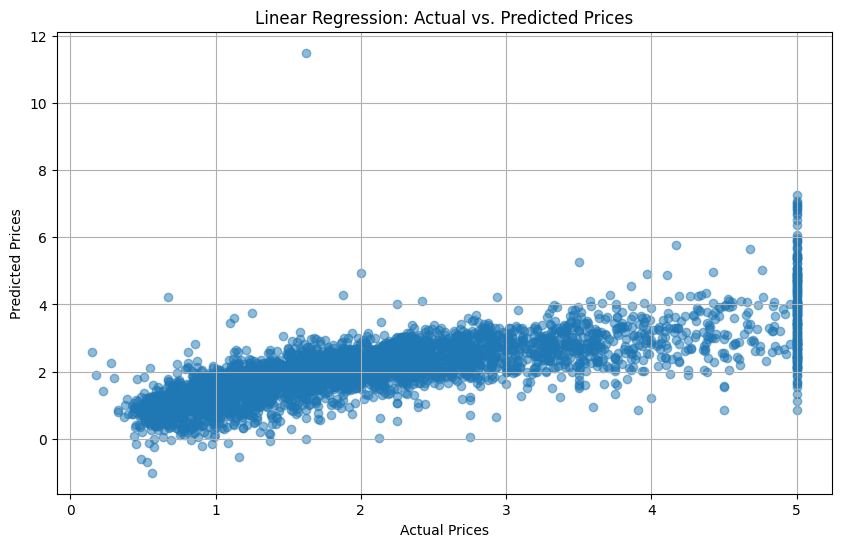

In [11]:
# Plotting actual vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs. Predicted Prices")
plt.grid(True)
plt.show()

Ridge Regression

In [12]:
from sklearn.linear_model import Ridge
import numpy as np

In [13]:
#Generating alpha values
alphas = np.logspace(-3, 3, 100)

In [14]:
#iterating for all the values if alpha
ridge_losses = []
for each_alpha in alphas:
    ridge_model = Ridge(alpha=each_alpha)
    ridge_model.fit(X_train_scaled, y_train)
    y_predict_ridge = ridge_model.predict(X_test_scaled)
    mse_ridge = mean_squared_error(y_test, y_predict_ridge)
    ridge_losses.append(mse_ridge)

In [15]:
ridge_losses

[0.5558915618350112,
 0.5558915563149546,
 0.5558915499682372,
 0.5558915426710632,
 0.5558915342810984,
 0.5558915246346932,
 0.5558915135436915,
 0.555891500791762,
 0.5558914861301772,
 0.555891469272965,
 0.5558914498913297,
 0.5558914276072419,
 0.5558914019860643,
 0.555891372528081,
 0.5558913386587491,
 0.5558912997174998,
 0.5558912549448595,
 0.5558912034676432,
 0.5558911442819361,
 0.5558910762335246,
 0.5558909979954052,
 0.5558909080419251,
 0.5558908046190602,
 0.5558906857102478,
 0.5558905489971161,
 0.5558903918143435,
 0.5558902110977807,
 0.5558900033248256,
 0.5558897644459043,
 0.5558894898057354,
 0.5558891740528588,
 0.5558888110356951,
 0.5558883936831416,
 0.555887913867418,
 0.5558873622465533,
 0.5558867280835182,
 0.555885999038581,
 0.5558851609309785,
 0.5558841974654389,
 0.5558830899184645,
 0.555881816778582,
 0.5558803533339681,
 0.5558786711999723,
 0.5558767377780677,
 0.5558745156366593,
 0.5558719618029753,
 0.5558690269539406,
 0.5558656544925236

In [16]:
# Find the index of the minimum MSE
min_mse_index = np.argmin(ridge_losses)

# Get the minimum MSE value
min_mse = ridge_losses[min_mse_index]

# Get the corresponding alpha value
best_alpha = alphas[min_mse_index]

print(f"The lowest MSE for Ridge Regression is: {min_mse}")
print(f"The corresponding alpha value is: {best_alpha}")

The lowest MSE for Ridge Regression is: 0.5522417424820718
The corresponding alpha value is: 247.7076355991714


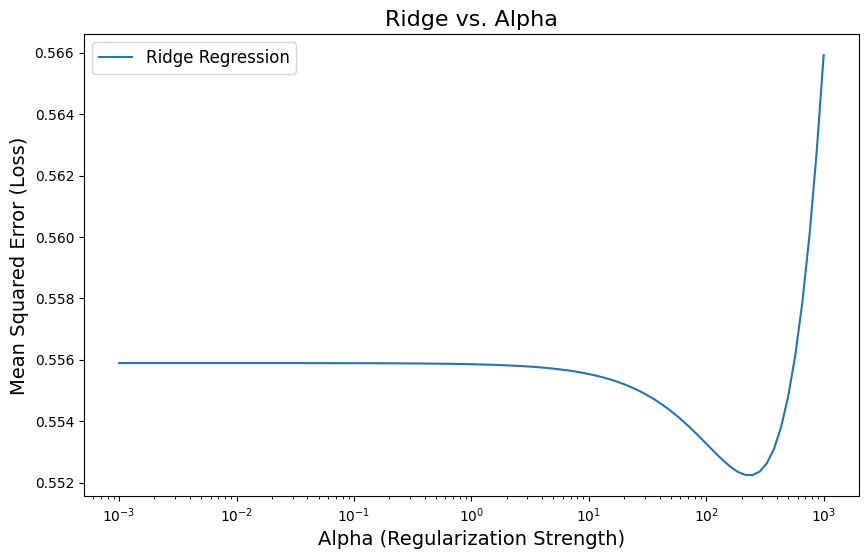

In [17]:
#Visualize the Ridge
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(alphas, ridge_losses, label="Ridge Regression")
ax.set_xscale('log')
ax.set_xlabel('Alpha (Regularization Strength)', fontsize=14)
ax.set_ylabel('Mean Squared Error (Loss)', fontsize=14)
ax.set_title('Ridge vs. Alpha', fontsize=16)
ax.legend(fontsize=12)

plt.show()

Lasso Regression

In [18]:
from sklearn.linear_model import Lasso

In [19]:
#Iterating Lasso for all the alpha values
lasso_losses = []
for each_alpha in alphas:
    lasso_model = Lasso(alpha=each_alpha)
    lasso_model.fit(X_train_scaled, y_train)
    y_predict_lasso = lasso_model.predict(X_test_scaled)
    mse_lasso = mean_squared_error(y_test, y_predict_lasso)
    lasso_losses.append(mse_lasso)

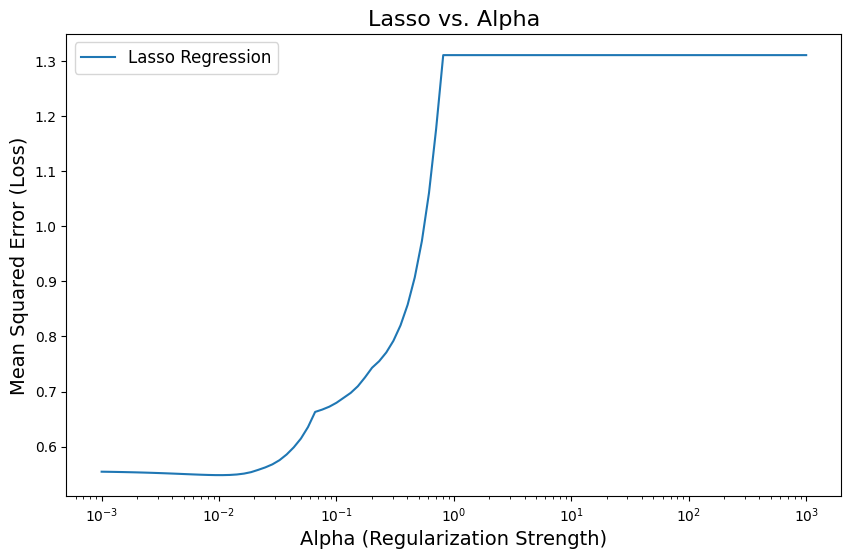

In [20]:
#Visualize the Lasso
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(alphas, lasso_losses, label="Lasso Regression")
ax.set_xscale('log')
ax.set_xlabel('Alpha (Regularization Strength)', fontsize=14)
ax.set_ylabel('Mean Squared Error (Loss)', fontsize=14)
ax.set_title('Lasso vs. Alpha', fontsize=16)
ax.legend(fontsize=12)

plt.show()

Ridge vs Lasso

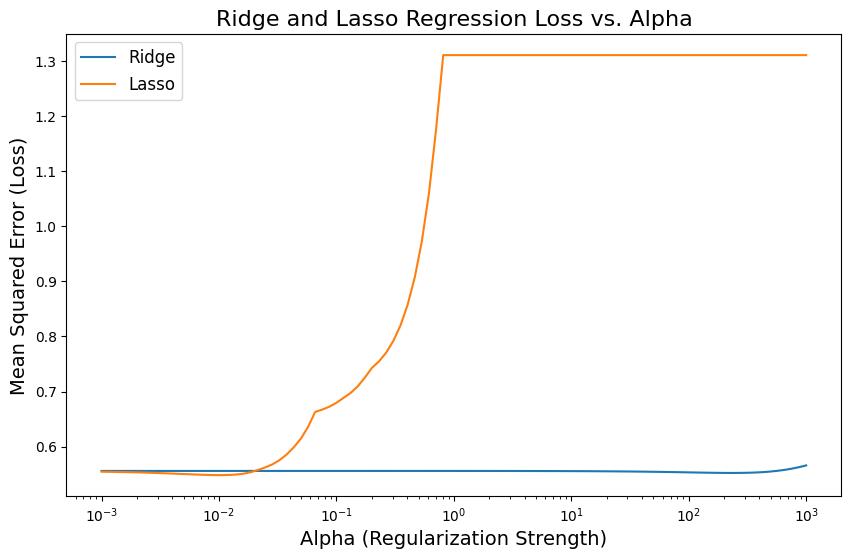

In [21]:
#Visualize the Ridge vs Lasso
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(alphas, ridge_losses, label='Ridge')
ax.plot(alphas, lasso_losses, label='Lasso')

ax.set_xscale('log')
ax.set_xlabel('Alpha (Regularization Strength)', fontsize=14)
ax.set_ylabel('Mean Squared Error (Loss)', fontsize=14)
ax.set_title('Ridge and Lasso Regression Loss vs. Alpha', fontsize=16)
ax.legend(fontsize=12)

plt.show()

Task 2: Wine Dataset

In [22]:
from sklearn.datasets import load_wine
import pandas as pd

In [23]:
wine_data = load_wine()
print(wine_data.feature_names)
print(wine_data.target)
print(wine_data.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['class_0' 'class_1' 'class_2']


In [24]:
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [25]:
X, y = load_wine(return_X_y=True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_predicted = model.predict(X_test_scaled)

In [30]:
#metrix
print("Accuracy: ", accuracy_score(y_test, y_predicted))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_predicted))
print("F1 Score: ", f1_score(y_test, y_predicted, average='weighted'))

Accuracy:  0.9814814814814815
Confusion Matrix: 
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]
F1 Score:  0.9815749306918357


In [31]:
model = LogisticRegression(solver='saga', penalty='l1')
model.fit(X_train_scaled, y_train)

y_predicted = model.predict(X_test_scaled)

d:\Projects\DS_ML_NLP\ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
d:\Projects\DS_ML_NLP\ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
d:\Projects\DS_ML_NLP\ML\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [32]:
#metrix when solver is saga
print("Accuracy: ", accuracy_score(y_test, y_predicted))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_predicted))
print("F1 Score: ", f1_score(y_test, y_predicted, average='weighted'))

Accuracy:  0.9814814814814815
Confusion Matrix: 
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]
F1 Score:  0.9815749306918357


SVM

In [33]:
from sklearn.svm import SVC

In [34]:
model = SVC(kernel='rbf')
model.fit(X_train_scaled, y_train)

y_predicted = model.predict(X_test_scaled)

In [35]:
print("Accuracy: ", accuracy_score(y_test, y_predicted))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_predicted))
print("F1 Score: ", f1_score(y_test, y_predicted, average='weighted'))

Accuracy:  0.9814814814814815
Confusion Matrix: 
 [[19  0  0]
 [ 0 21  0]
 [ 0  1 13]]
F1 Score:  0.9813538775640411


In [36]:
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

y_predicted = model.predict(X_test_scaled)

In [37]:
print("Accuracy: ", accuracy_score(y_test, y_predicted))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_predicted))
print("F1 Score: ", f1_score(y_test, y_predicted, average='weighted'))

Accuracy:  0.9814814814814815
Confusion Matrix: 
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]
F1 Score:  0.9815749306918357


Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
#Using entropy as criterion to split
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train_scaled, y_train)

y_predicted = dt_model.predict(X_test_scaled)

In [40]:
print("Accuracy: ", accuracy_score(y_test, y_predicted))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_predicted))
print("F1 Score: ", f1_score(y_test, y_predicted, average='weighted'))

Accuracy:  0.8703703703703703
Confusion Matrix: 
 [[19  0  0]
 [ 2 18  1]
 [ 2  2 10]]
F1 Score:  0.8672129737170388


In [41]:
#Using gini by default as criterion to split
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

y_predicted = dt_model.predict(X_test_scaled)

In [42]:
print("Accuracy: ", accuracy_score(y_test, y_predicted))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_predicted))
print("F1 Score: ", f1_score(y_test, y_predicted, average='weighted'))

Accuracy:  0.9629629629629629
Confusion Matrix: 
 [[18  1  0]
 [ 0 21  0]
 [ 1  0 13]]
F1 Score:  0.9628353590455226


Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

y_predicted = rf_model.predict(X_test_scaled)

In [45]:
print("Accuracy: ", accuracy_score(y_test, y_predicted))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_predicted))
print("F1 Score: ", f1_score(y_test, y_predicted, average='weighted'))

Accuracy:  1.0
Confusion Matrix: 
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
F1 Score:  1.0


In [46]:
rf_model = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=200)
rf_model.fit(X_train_scaled, y_train)

y_predicted = rf_model.predict(X_test_scaled)

In [47]:
print("Accuracy: ", accuracy_score(y_test, y_predicted))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_predicted))
print("F1 Score: ", f1_score(y_test, y_predicted, average='weighted'))

Accuracy:  1.0
Confusion Matrix: 
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
F1 Score:  1.0


Neural Network

In [48]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine

ModuleNotFoundError: No module named 'torch'

In [ ]:
#loading the wine data
data = load_wine()
print(data.target)
print(data.feature_names)
print(len(data.feature_names))
print(data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
13
['class_0' 'class_1' 'class_2']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['alcohol', 'malic_acid', 'ash'

In [ ]:
X,y = load_wine(return_X_y=True)

In [ ]:
#Converting into pytorch datatype
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)
print(y)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 

In [ ]:
#We are having 13 features and 3 output values
model = nn.Sequential(
    nn.Linear(13, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 3))

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=13, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=3, bias=True)
)
Sequential(
  (0): Linear(in_features=13, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=3, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
n_epochs = 100
batch_size = 20

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 25.19131088256836
Finished epoch 1, latest loss 22.152210235595703
Finished epoch 2, latest loss 19.728403091430664
Finished epoch 3, latest loss 17.066450119018555
Finished epoch 4, latest loss 13.948246002197266
Finished epoch 5, latest loss 11.39506721496582
Finished epoch 6, latest loss 8.859541893005371
Finished epoch 7, latest loss 6.016833782196045
Finished epoch 8, latest loss 3.2760558128356934
Finished epoch 9, latest loss 1.1980668306350708
Finished epoch 10, latest loss 1.0185257196426392
Finished epoch 11, latest loss 1.357332468032837
Finished epoch 12, latest loss 1.4305206537246704
Finished epoch 13, latest loss 1.3948190212249756
Finished epoch 14, latest loss 1.2847192287445068
Finished epoch 15, latest loss 1.280912160873413
Finished epoch 16, latest loss 1.3202803134918213
Finished epoch 17, latest loss 1.309950590133667
Finished epoch 18, latest loss 1.2941570281982422
Finished epoch 19, latest loss 1.2841068506240845
Finished epoch 20

In [ ]:
#predictions = model(X)
# round predictions
#rounded = predictions.round()
predictions = torch.argmax(model(X), dim=1)
for i in range(30):
    print('For point %d : Predicted  %d (expected %d)' % (i, predictions[i].item(), y[i].item()))

For point 0 : Predicted  0 (expected 0)
For point 1 : Predicted  0 (expected 0)
For point 2 : Predicted  0 (expected 0)
For point 3 : Predicted  0 (expected 0)
For point 4 : Predicted  1 (expected 0)
For point 5 : Predicted  0 (expected 0)
For point 6 : Predicted  0 (expected 0)
For point 7 : Predicted  0 (expected 0)
For point 8 : Predicted  0 (expected 0)
For point 9 : Predicted  0 (expected 0)
For point 10 : Predicted  0 (expected 0)
For point 11 : Predicted  0 (expected 0)
For point 12 : Predicted  0 (expected 0)
For point 13 : Predicted  0 (expected 0)
For point 14 : Predicted  0 (expected 0)
For point 15 : Predicted  0 (expected 0)
For point 16 : Predicted  0 (expected 0)
For point 17 : Predicted  0 (expected 0)
For point 18 : Predicted  0 (expected 0)
For point 19 : Predicted  1 (expected 0)
For point 20 : Predicted  1 (expected 0)
For point 21 : Predicted  1 (expected 0)
For point 22 : Predicted  0 (expected 0)
For point 23 : Predicted  0 (expected 0)
For point 24 : Predicted  

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
accuracy = print('Accuracy score of the  model is ',accuracy_score(y, predictions))
print('F1 Score of the model is ',f1_score(y, predictions, average='weighted'))
confusion_matrix(y, predictions, labels = [2, 1, 0])

Accuracy score of the  model is  0.8595505617977528
F1 Score of the model is  0.8599768165956126


array([[38,  8,  2],
       [ 2, 64,  5],
       [ 0,  8, 51]])

Accuracy score of the  model is  0.9157303370786517
F1 Score of the model is  0.9163859579435514


array([[44,  4,  0],
       [ 0, 68,  3],
       [ 0,  8, 51]])

Using LeakyReLU

In [ ]:
X,y = load_wine(return_X_y=True)

In [ ]:
#Converting into pytorch datatype
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)
print(y)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 

In [ ]:
#We are having 13 features and 3 output values
model = nn.Sequential(
    nn.Linear(13, 20),
    nn.LeakyReLU(),
    nn.Linear(20, 10),
    nn.LeakyReLU(),
    nn.Linear(10, 3))

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=13, out_features=20, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=20, out_features=10, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=10, out_features=3, bias=True)
)
Sequential(
  (0): Linear(in_features=13, out_features=20, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=20, out_features=10, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=10, out_features=3, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
n_epochs = 100
batch_size = 20

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 108.73683166503906
Finished epoch 1, latest loss 95.12521362304688
Finished epoch 2, latest loss 83.70980834960938
Finished epoch 3, latest loss 75.26271057128906
Finished epoch 4, latest loss 65.27245330810547
Finished epoch 5, latest loss 56.80960464477539
Finished epoch 6, latest loss 50.23063659667969
Finished epoch 7, latest loss 44.641578674316406
Finished epoch 8, latest loss 39.43626403808594
Finished epoch 9, latest loss 34.4726448059082
Finished epoch 10, latest loss 29.15627670288086
Finished epoch 11, latest loss 23.960739135742188
Finished epoch 12, latest loss 18.928606033325195
Finished epoch 13, latest loss 13.999662399291992
Finished epoch 14, latest loss 9.113926887512207
Finished epoch 15, latest loss 4.746560573577881
Finished epoch 16, latest loss 2.664486885070801
Finished epoch 17, latest loss 1.6193608045578003
Finished epoch 18, latest loss 1.239627718925476
Finished epoch 19, latest loss 1.1548476219177246
Finished epoch 20, lates

In [ ]:
predictions = torch.argmax(model(X), dim=1)
for i in range(30):
    print('For point %d : Predicted  %d (expected %d)' % (i, predictions[i].item(), y[i].item()))

For point 0 : Predicted  0 (expected 0)
For point 1 : Predicted  0 (expected 0)
For point 2 : Predicted  0 (expected 0)
For point 3 : Predicted  0 (expected 0)
For point 4 : Predicted  1 (expected 0)
For point 5 : Predicted  0 (expected 0)
For point 6 : Predicted  0 (expected 0)
For point 7 : Predicted  0 (expected 0)
For point 8 : Predicted  0 (expected 0)
For point 9 : Predicted  0 (expected 0)
For point 10 : Predicted  0 (expected 0)
For point 11 : Predicted  0 (expected 0)
For point 12 : Predicted  0 (expected 0)
For point 13 : Predicted  0 (expected 0)
For point 14 : Predicted  0 (expected 0)
For point 15 : Predicted  0 (expected 0)
For point 16 : Predicted  0 (expected 0)
For point 17 : Predicted  0 (expected 0)
For point 18 : Predicted  0 (expected 0)
For point 19 : Predicted  1 (expected 0)
For point 20 : Predicted  1 (expected 0)
For point 21 : Predicted  1 (expected 0)
For point 22 : Predicted  0 (expected 0)
For point 23 : Predicted  0 (expected 0)
For point 24 : Predicted  

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
accuracy = print('Accuracy score of the  model is ',accuracy_score(y, predictions))
print('F1 Score of the model is ',f1_score(y, predictions, average='weighted'))
confusion_matrix(y, predictions, labels = [2, 1, 0])

Accuracy score of the  model is  0.6629213483146067
F1 Score of the model is  0.6654272608217727


array([[28, 18,  2],
       [28, 39,  4],
       [ 0,  8, 51]])